In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from utils.plot_utils import plot_results
from utils.plot_utils import plot_accuracies
from run import full_train_test
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Overview 

Main notebook used to provide a tool for reproducing accuracy and convergence results shown in the report of the *Frank and Wolf vs Coordinate Descent for DeepNeural Networks*

For reproducing the results we provide two options: 

- Training the model again using DFW and BCD 
- Load the results from the pickle files in `results`

**Note**: The training time highly depends on the machine used for the training.. 

## Running the training-testing experimental procedure

In [ ]:
times_dict = {'BCD': [], 'DFW': []}
accuracies_dict = {'BCD': [], 'DFW': []}
train_accuracy_evolution_dict = {'BCD': [], 'DFW': []} 
test_accuracy_evolution_dict = {'BCD': [], 'DFW': []} 

In [ ]:
N_TRAIN_SAMPLES = 60000
N_VALI_SAMPLES = 10000
N_ITER = 5
N_EPOCHS = 20
BATCH_SIZE = 500

for d in [500, 1000, 1500]:
    tr_acc_evo, te_acc_evo, accuracy_test_array, time_array = full_train_test('DFW', N_TRAIN_SAMPLES, N_VALI_SAMPLES, N_ITER,
                                                            N_EPOCHS, BATCH_SIZE, verbose=True, d1=d, d2=d, d3=d)
    times_dict['DFW'].append(time_array)
    accuracies_dict['DFW'].append(accuracy_test_array)
    train_accuracy_evolution_dict['DFW'].append(tr_acc_evo)
    test_accuracy_evolution_dict['DFW'].append(te_acc_evo)

    tr_acc_evo, te_acc_evo, accuracy_test_array, time_array = full_train_test('BCD', N_TRAIN_SAMPLES, N_VALI_SAMPLES, N_ITER,
                                                            N_EPOCHS, verbose=True, d1=d, d2=d, d3=d)
    train_accuracy_evolution_dict['BCD'].append(tr_acc_evo)
    test_accuracy_evolution_dict['BCD'].append(te_acc_evo)
    times_dict['BCD'].append(time_array)
    accuracies_dict['BCD'].append(accuracy_test_array)


Iteration 1
Epoch: 1 / 20 
 Train loss: 0.9458 - Test loss:0.9477 
 Train acc: 0.6037 - Test acc: 0.6100
Epoch: 2 / 20 
 Train loss: 0.5187 - Test loss:0.5189 
 Train acc: 0.8047 - Test acc: 0.8056
Epoch: 3 / 20 
 Train loss: 0.2673 - Test loss:0.2601 
 Train acc: 0.9005 - Test acc: 0.9038
Epoch: 4 / 20 
 Train loss: 0.2031 - Test loss:0.1984 
 Train acc: 0.9238 - Test acc: 0.9260
Epoch: 5 / 20 
 Train loss: 0.1714 - Test loss:0.1682 
 Train acc: 0.9353 - Test acc: 0.9381
Epoch: 6 / 20 
 Train loss: 0.1468 - Test loss:0.1468 
 Train acc: 0.9445 - Test acc: 0.9448
Epoch: 7 / 20 
 Train loss: 0.1281 - Test loss:0.1287 
 Train acc: 0.9517 - Test acc: 0.9508
Epoch: 8 / 20 
 Train loss: 0.1137 - Test loss:0.1161 
 Train acc: 0.9576 - Test acc: 0.9541
Epoch: 9 / 20 
 Train loss: 0.1018 - Test loss:0.1061 
 Train acc: 0.9619 - Test acc: 0.9588
Epoch: 10 / 20 
 Train loss: 0.0920 - Test loss:0.0990 
 Train acc: 0.9656 - Test acc: 0.9619
Epoch: 11 / 20 
 Train loss: 0.0833 - Test loss:0.0918 
 

## Results dumping in pickles

In [ ]:
with open('../results/times.pkl',mode='wb') as f:
    pickle.dump(times_dict,f)
with open('../results/accs.pkl',mode='wb') as f:
    pickle.dump(accuracies_dict,f)
with open('../results/te_acc_evo.pkl',mode='wb') as f:
    pickle.dump(test_accuracy_evolution_dict,f)
with open('../results/tr_acc_evo.pkl',mode='wb') as f:
    pickle.dump(train_accuracy_evolution_dict,f)


## Load results 

In [ ]:
with open('../results/times.pkl',mode='rb') as f:
    times_dict = pickle.load(f)
with open('../results/accs.pkl',mode='rb') as f:
    accs_dict = pickle.load(f)
with open('../results/te_acc_evo.pkl',mode='rb') as f:
    test_accuracy_evolution_dict = pickle.load(f)
with open('../results/tr_acc_evo.pkl',mode='rb') as f:
    train_accuracy_evolution_dict = pickle.load(f)

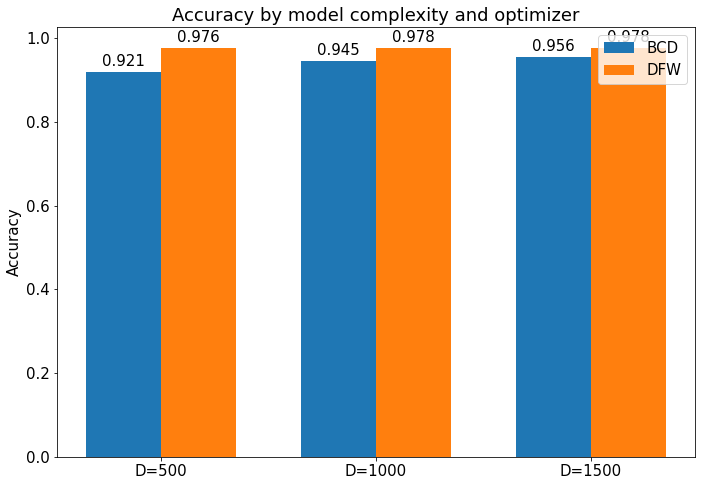

In [ ]:
plot_results(accs_dict, ylabel='Accuracy', title='Accuracy by model complexity and optimizer',
                 filename='../results/accuracies.pdf')

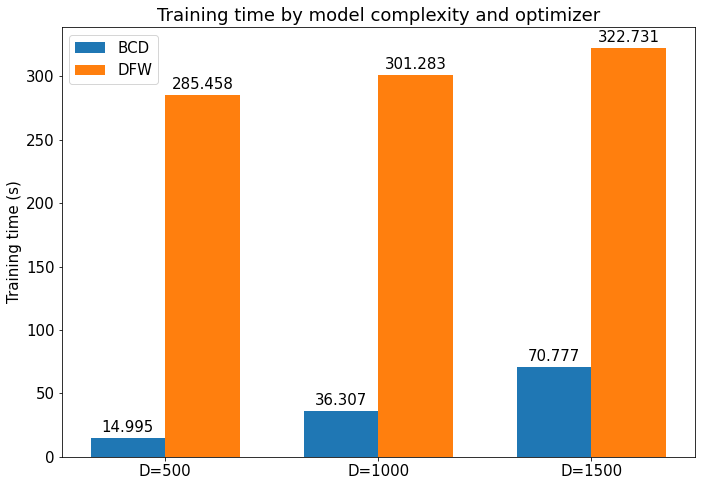

In [ ]:
plot_results(times_dict, ylabel='Training time (s)', title='Training time by model complexity and optimizer',
                 filename='../results/times.pdf')

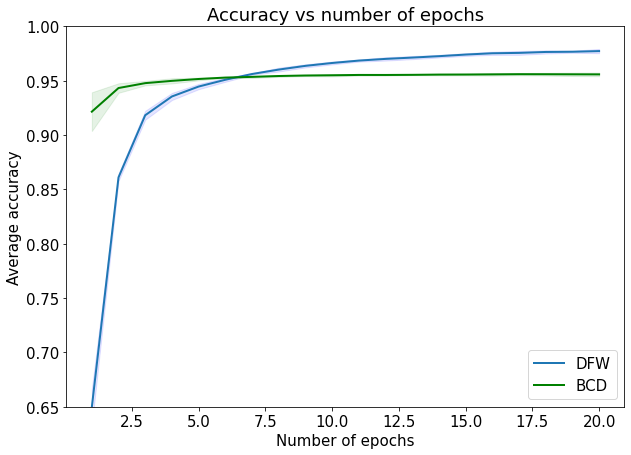

In [ ]:
plot_accuracies(test_accuracy_evolution_dict['DFW'][2],test_accuracy_evolution_dict['BCD'][2],'../results/acc_evo.pdf')